In [2]:
%matplotlib inline

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math
import matplotlib

In [4]:
data = loadmat('./data/ex7data1.mat')

In [5]:
X = data['X']

[0.5, 6.5, 2, 8]

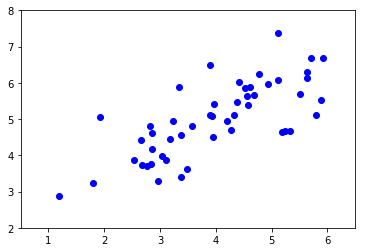

In [6]:
plt.plot(X[:,0], X[:,1], 'bo')
plt.axis([0.5, 6.5, 2, 8])

In [7]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu)/sigma
    return (X_norm, mu, sigma)

In [8]:
X_norm, mu, sigma = feature_normalize(X)

In [9]:
X.shape

(50, 2)

PCA requires first to compute covariance matrix $\sum$ and then it requires the Singular Value Decomposition on Covariance Matrix

In [10]:
def PCA(X):
    m, n = X.shape
    U = np.zeros((n,1))
    S = np.zeros((n,1))
    covariance_matrix = (np.dot(X.T, X))/m
    U, S, V = np.linalg.svd(covariance_matrix)
    return (U, S)

In [11]:
U, S = PCA(X_norm)

In [12]:
U.shape

(2, 2)

In [13]:
S = S.reshape((-1,1))

In [14]:
def draw_line(p1, p2):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '-k', 'LineWidth', 2)

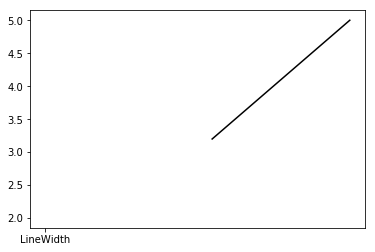

In [15]:
draw_line(mu, mu + 1.5 * S[0,0] * U[:,0].T )

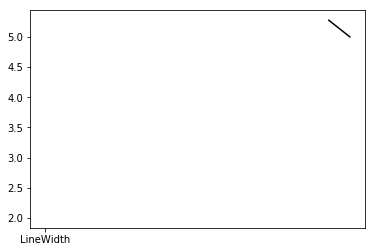

In [16]:
draw_line(mu, mu + 1.5 * S[1,0] * U[:,1].T)

In [17]:
S.shape

(2, 1)

In [18]:
U

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

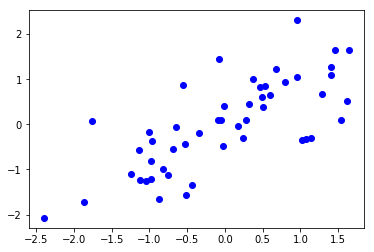

In [19]:
plt.plot(X_norm[:,0], X_norm[:,1], 'bo')

In [20]:
K = 1 #Number of dimensions

In [21]:
def project_data(X, U, K):
    Z = np.zeros((X.shape[0], K))
    for i in range(len(X)):
        x = X[i,:].reshape((-1, 1))
#         x = x.reshape((-1,1))
#         print(x.shape)
#         x = x.T
        for j in range(K):
#         print(U[:,K].reshape((-1,1)).shape)
            projection_k = np.dot(x.T, U[:,j])
            Z[i,j] = projection_k
    return Z

In [22]:
Z = project_data(X_norm, U, K)

In [23]:
Z

array([[ 1.48127391],
       [-0.91291229],
       [ 1.21208656],
       [ 1.62734009],
       [ 1.26042409],
       [-0.96700223],
       [ 1.25605967],
       [-2.31794969],
       [-0.02968998],
       [-0.77386123],
       [-0.62532902],
       [-0.54724542],
       [-0.08878025],
       [-0.520569  ],
       [ 1.548434  ],
       [-1.89684585],
       [-0.87788459],
       [ 0.94646472],
       [-2.30653955],
       [-0.4731351 ],
       [-2.19518524],
       [ 0.38509662],
       [-1.76688508],
       [ 0.0512347 ],
       [ 1.64838858],
       [ 0.5030287 ],
       [-1.2246766 ],
       [-1.16020771],
       [ 0.83375215],
       [-0.00686207],
       [-0.22565101],
       [-1.49788781],
       [ 1.3252858 ],
       [-0.58656923],
       [ 0.67225099],
       [-1.33938187],
       [ 1.67053477],
       [-1.37836539],
       [ 2.53419743],
       [-0.27570789],
       [-0.96695982],
       [ 0.8792732 ],
       [ 1.28362916],
       [-0.97972107],
       [ 1.79450473],
       [-0

In [29]:
def recover_data(Z, U, K):
    X_rec = np.zeros((Z.shape[0], U.shape[1]))
    for i in range(len(Z)):
        v = Z[i,:].reshape((-1,1))
        for j in range(U.shape[0]):
            recovered_j = np.dot(v.T, U[j, :K])
            X_rec[i, j] = recovered_j
    return X_rec

In [30]:
X_rec = recover_data(Z, U, K)

In [31]:
X_rec

array([[-1.04741883, -1.04741883],
       [ 0.64552647,  0.64552647],
       [-0.85707463, -0.85707463],
       [-1.15070321, -1.15070321],
       [-0.89125442, -0.89125442],
       [ 0.68377384,  0.68377384],
       [-0.88816831, -0.88816831],
       [ 1.63903794,  1.63903794],
       [ 0.02099398,  0.02099398],
       [ 0.54720252,  0.54720252],
       [ 0.44217439,  0.44217439],
       [ 0.38696095,  0.38696095],
       [ 0.06277712,  0.06277712],
       [ 0.36809787,  0.36809787],
       [-1.09490818, -1.09490818],
       [ 1.34127256,  1.34127256],
       [ 0.62075814,  0.62075814],
       [-0.66925162, -0.66925162],
       [ 1.63096976,  1.63096976],
       [ 0.33455704,  0.33455704],
       [ 1.55223037,  1.55223037],
       [-0.27230443, -0.27230443],
       [ 1.24937642,  1.24937642],
       [-0.03622841, -0.03622841],
       [-1.16558674, -1.16558674],
       [-0.355695  , -0.355695  ],
       [ 0.86597713,  0.86597713],
       [ 0.82039074,  0.82039074],
       [-0.5895518 ,

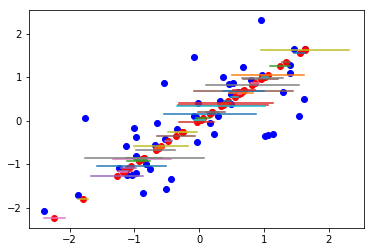

In [36]:
plt.plot(X_norm[:,0], X_norm[:,1], 'bo')
plt.plot(X_rec[:,0], X_rec[:,1], 'ro')
for i in range(X.shape[0]):
    plt.plot(X_norm[i,: ], X_rec[i, :])

### Face Data 

In [37]:
data_face = loadmat('./data/ex7faces.mat')

In [40]:
X = data_face['X']

In [90]:
X.shape

(5000, 1024)

In [77]:
def displayData(X):
    m, n = X.shape
    example_width = round(math.sqrt(n))   #width of each training example(digit) or image to be plotted
    example_height = round(n/example_width) #height of each training example(digit) or image to be plotted
    pad = 1  #giving padding of 1 pixel between all the images
    display_rows = math.floor(math.sqrt(m))  #number of rows to be displayed =10
    display_cols = math.ceil(m/display_rows) #number of columns to be displayed =10
    display_array = -np.ones((pad + display_rows*(example_height + pad),pad + display_cols*(example_width + pad)))   # the array to be plotted, initialising it to 1 
    #display array is 211*211 matrix (200 for digits(20*10 for horizontal and vertical axis) and 11 pixels for padding between digits and boundaries of image)
    curr_ex = 0 #current example to work on
    for i in range(1, display_rows+1):
        for j in range(1, display_cols+1):
            if (curr_ex>=m):
                break
            else:
                max_val = max(abs(X[curr_ex]))  #for scaling
                display_array[pad + (i-1)*(example_height + pad): i*(example_height+pad), pad + (j-1)*(example_width + pad) : j*(example_width+pad)] = X[curr_ex].reshape((example_height,example_width))/max_val
                #display_array[1:20,1:20] = X[0].reshape((20,20))/max_val
                curr_ex = curr_ex + 1
        if (curr_ex>=m):
            break
    plt.imshow(display_array, cmap='gray')
    plt.axis('off')
    plt.show()

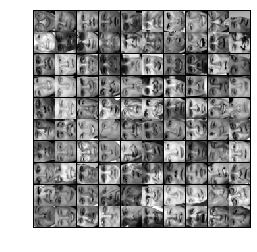

In [80]:
displayData(X[:100, :])

In [81]:
X_norm, mu, sigma = feature_normalize(X)

In [82]:
U, S = PCA(X_norm)

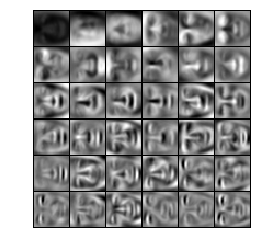

In [86]:
displayData(U[:,:36].T)

In [87]:
K = 100

In [88]:
Z = project_data(X_norm, U, K)

In [89]:
Z.shape

(5000, 100)

In [91]:
X_rec = recover_data(Z, U, K)

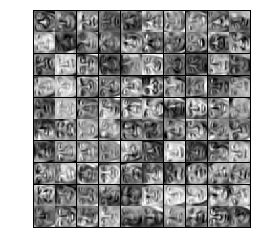

In [94]:
displayData(X_rec[:100])